# Lecture 24 - Support Vector Machine

In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-colorblind')
from IPython.display import Image

# Exercise on the Perceptron Algorithm

Suppose that you have data samples from two **linearly separable** classes $C_1$ and $C_2$ in 2-D, and you found the linear decision boundary:

1. How many parameters need to be found to determine the linear boundary that separates the two classes?

2. Suppose you found the boundary line: $y = -x - 1.5$. Draw the Perceptron with the provided parameters.

# Kernel Machine

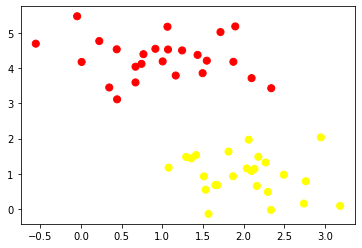

In [26]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

A linear discriminative classifier would attempt to draw a straight line separating the two sets of data, and thereby create a model for classification. For two dimensional data like that shown here, this is a task we could do by hand. But immediately we see a problem: there is more than one possible dividing line that can perfectly discriminate between the two classes!

We can draw them as follows:

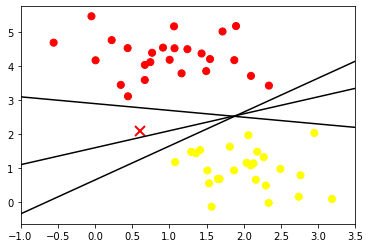

In [27]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

These are three very different separators which, nevertheless, perfectly discriminate between these samples. Depending on which you choose, a new data point (e.g., the one marked by the "X" in this plot) will be assigned a different label! Evidently our simple intuition of "drawing a line between classes" is not enough, and we need to think a bit deeper.

# Kernel Machine

Consider the following data set:

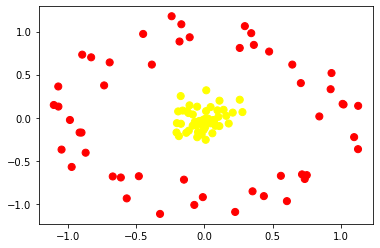

In [28]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

The two classes are clearly not linearly separable. What would you do?

In [29]:
r = np.exp(-((X - X.mean(axis=0))** 2/(2*X.std(axis=0, ddof=1)**2)).sum(axis=1))

<IPython.core.display.Javascript object>


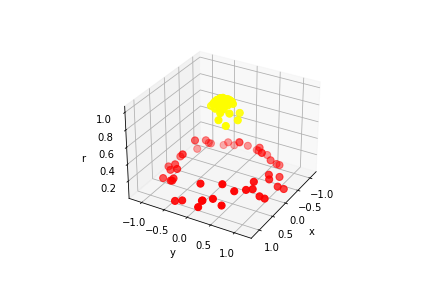

In [32]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

%matplotlib notebook
plot_3D();

## Support Vector Machines: Maximizing the Margin

SVMs offer one way to improve on this. The intuition is this: rather than simply drawing a zero-width line between the classes, we can draw around each line a margin of some width, up to the nearest point. Here is an example of how this might look:

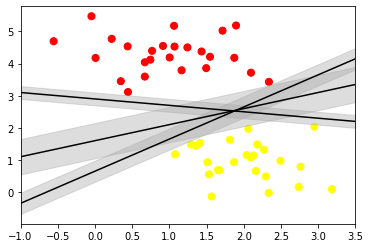

In [33]:
%matplotlib inline
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

In support vector machines, the line that maximizes this margin is the one we will choose as the optimal model. Support vector machines are an example of such a maximum margin estimator.

# Support Vector Machine: Separable Classes

Let's start with the two-class linearly separable task and then we will extend the method to more general cases where data are not separable. Let $\phi(x_i)$, $i=1,2,\dots,N$, be the feature vectors of the training set, $X$, and corresponding target values $t_1, t_2, \cdots, t_N$ where $t_n\in\{-1,1\}$. These belong to either of two classes, $C_1$, $C_2$, which are *assumed to be linearly separable*.

The goal, once more, is to design a hyperplane

$$y(x) = w^T\phi(x) + b = 0$$

that classifies correctly all the training vectors.

Because the training data is linearly separable in the feature space, by definition there exists at least one choice of the parameters $w$ and $b$ such that $y(x)$ satisfies $y(x_n)>0$ for points having $t_n = +1$ and $y(x_n)<0$ for points having $t_n = -1$, so that $t_ny(x_n) > 0$ for all training data points.

Such a hyperplane is not unique. The perceptron algorithm may converge to any one of the possible solutions. Having gained in experience, this time we will be more demanding. 

* Which hyperplane would any sensible engineer choose as the classifier for operation in practice, where data outside the training set will be fed to it? 

* Once again, the hyperplane that leaves more “room” on either side, so that data in both classes can move a bit more freely, with less risk of causing an error. 

* A sensible choice for the hyperplane classifier would be the one that leaves the maximum margin from both classes.

* Thus such a hyperplane can be trusted more, when it is faced with the challenge of operating with unknown data.
    * It has a higher generalizarion performance.

## Quantifying the "Margin"

Let us now quantify the term "margin" that a hyperplane leaves from both classes. Every hyperplane is characterized by its direction (determined by $w$) and its exact position in space (determined by $b$). Since we want to give no preference to either of the classes, then it is reasonable for each direction to select that hyperplane which has the same distance from the respective nearest points in $c_1$ and $c_2$.

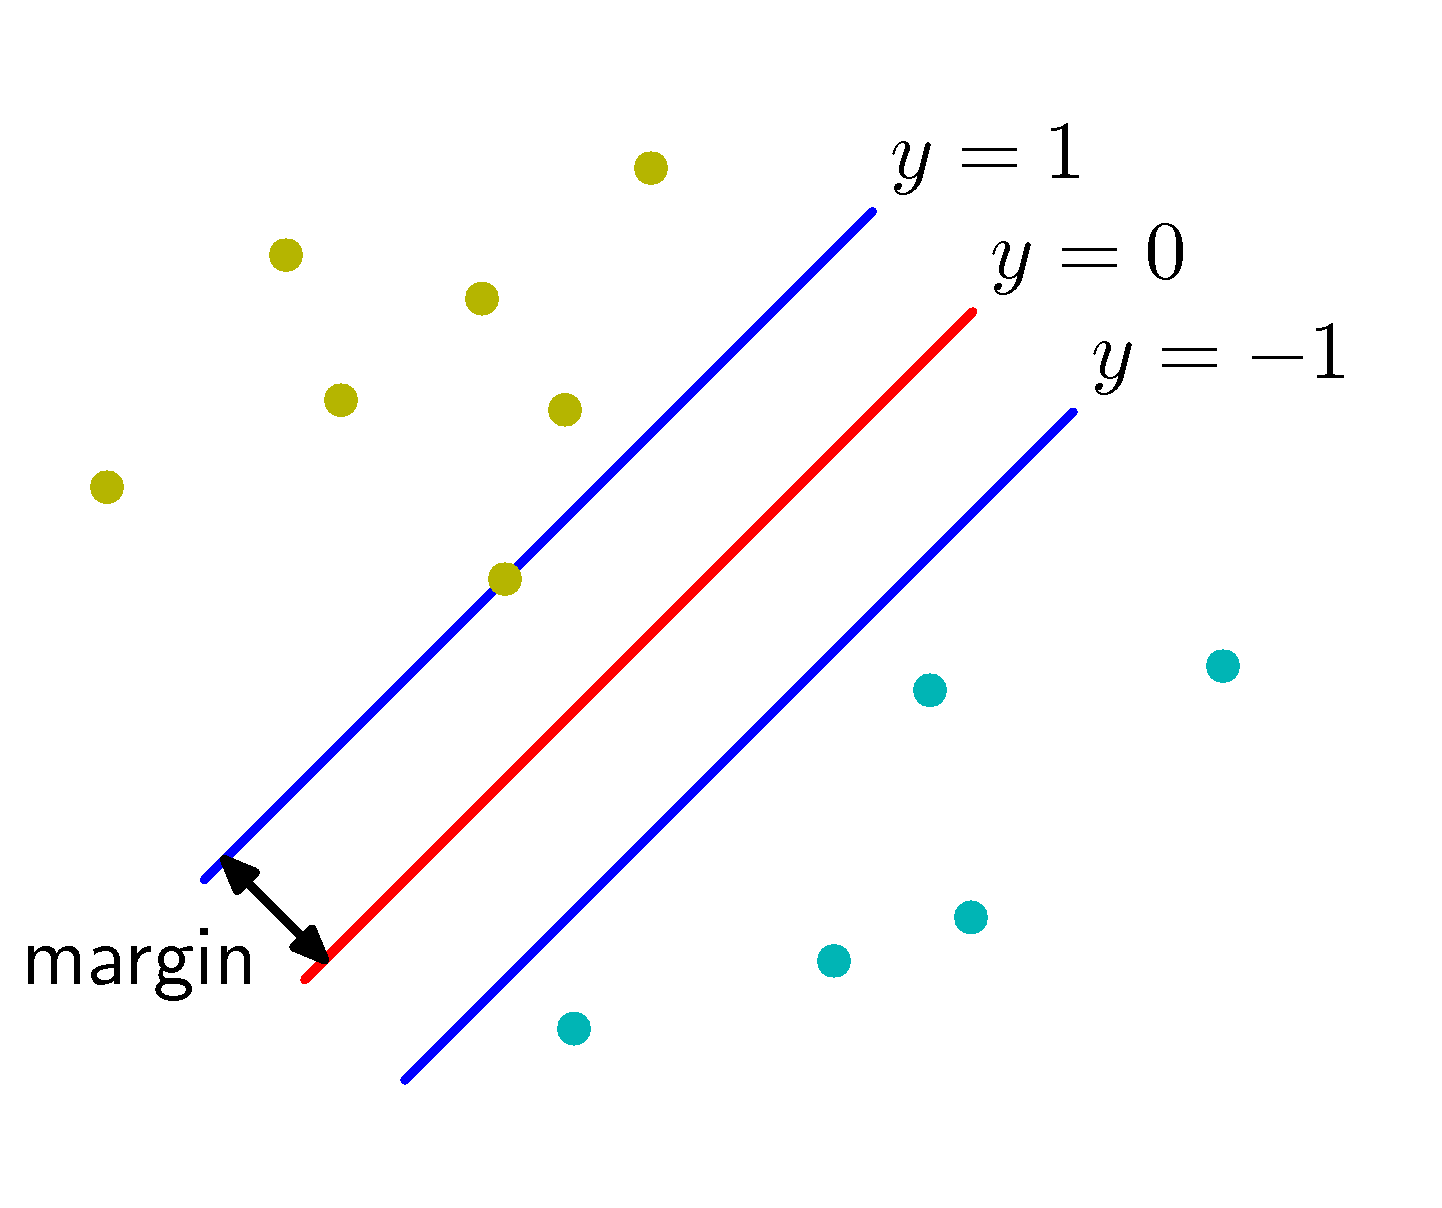

In [13]:
Image('figures/Figure7.1a.png', width=400)

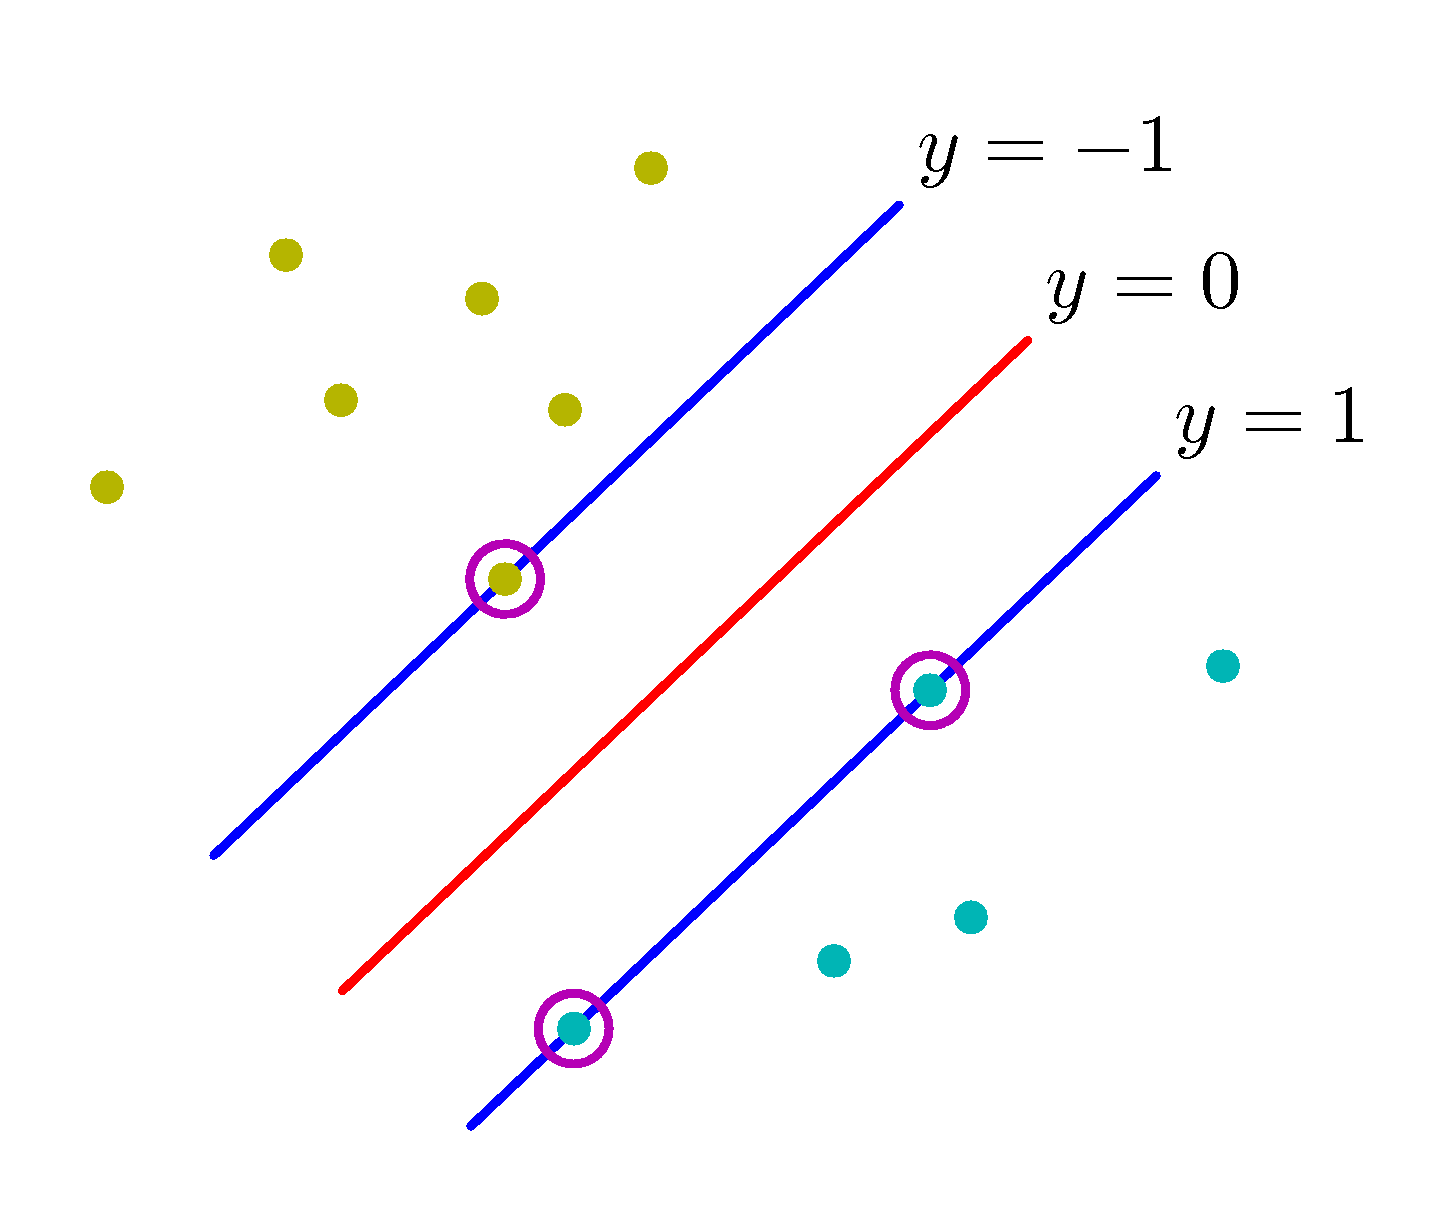

In [14]:
Image('figures/Figure7.1b.png', width=400)

Recall that the perpendicular distance of a point $x$ from a hyperplane defined by $y(x) = 0$ where $y(x)$ takes the form $y(x) = w^T\phi(x)+b$ is given by $\frac{|y(x)|}{\Vert w\Vert}$.


Furthermore, we are only interested in solutions for which all data points are correctly classified, so that $t_n y(x_n) > 0, \forall n$. Thus the distance of a point $x_n$ to the decision surface is given by

$$\frac{t_n y(x_n)}{\Vert w\Vert} = \frac{t_n \left(w^t\phi(x_n) + b\right)}{\Vert w\Vert}$$

The margin is given by the perpendicular distance to the closest point $x_n$ from the data set, and we wish to optimize the parameters $w$ and $b$ in order to maximize this distance. Thus the maximum margin solution is found by solving

$$\arg_{w,b}\max \left\{\frac{1}{\Vert w\Vert}\min_n \left[t_n(w^T\phi(x_n)+b)\right]\right\}$$

where the factor $\frac{1}{\Vert w\Vert}$ is taken outside the optimization over $n$ because $w$ does not depend on $n$.

* Direct solution of this optimization problem would be very complex, and so we shall convert it into an equivalent problem that is much easier to solve. 

* To do this we note that if we make the rescaling $w\rightarrow \kappa w$ and $b\rightarrow \kappa b$, then the distance from any point $x_n$ to the decision surface, given by $\frac{t_n y(x_n)}{\Vert w\Vert}$, is unchanged. We can use this freedom to set

$$t_n(w^T\phi(x_n)+b) = 1$$

for the point that is closest to the surface, called the **support vectors**. In this case, all data points will satisfy the constraints

$$t_n(w^T\phi(x_n)+b) \geq 1, n=1, 2, \dots, N$$

* This is known as the canonical representation of the decision hyperplane. 

* In the case of data points for which the equality holds (support vectors), the constraints are said to be active, whereas for the remainder they are said to be inactive. 

* By definition, there will always be at least one active constraint, because there will always be a closest point, and once the margin has been maximized there will be at least two active constraints.

The optimization problem then simply requires that we maximize $\Vert w\Vert^{-1}$, which is equivalent to minimizing $\Vert w\Vert^2$, and so we have to solve the optimization problem

\begin{align}
&\arg_{w,b}\min \frac{1}{2} \Vert w\Vert^2 \\
& \text{subject to } t_n(w^T\phi(x_n)+b) \geq 1
\end{align}

To be continued...

In order to solve this constrained optimization problem, we introduce *Lagrange multipliers* $a_n \geq 0$, with one multiplier an for each of the constraints, giving the Lagrangian function

$$L(w,b,a) = \frac{1}{2}\Vert w\Vert^2 - \sum_{n=1}^N a_n \left(t_n(w^T\phi(x_n)+b) - 1\right)$$

* Note the minus sign in front of the Lagrange multiplier term, because we are minimizing with respect to $w$ and $b$, and maximizing with respect to $a$. 

Setting the derivatives of $L(w, b, a)$ with respect to $w$ and $b$ equal to zero, we obtain the following two conditions:

$$w = \sum_{n=1}^N a_nt_n\phi(x_n)$$

$$ 0 = \sum_{n=1}^N a_nt_n$$

Eliminating $w$ and $b$ from $L(w, b, a)$ using these conditions then gives the *dual representation* of the maximum margin problem in which we maximize

$$\tilde{L}(a) = \sum_{n=1}^N a_n - \sum_{n=1}^N\sum_{m=1}^N a_n a_m t_n t_m k(x_n, x_m)$$

with respect to a subject to the constraints

$$a_n \geq 0, n=1,2,\dots, N$$

$$\sum_{n=1}^N a_nt_n = 0$$

Here the kernel function is defined by $k(x,y) = \phi(x)^T \phi(y)$. 

* This takes the form of a quadratic programming problem in which we optimize a quadratic function of a subject to a set of inequality constraints.

* The solution to a quadratic programming problem in $M$ variables in general has computational complexity that is $O(M^3)$. In going to the dual formulation we have turned the original optimization problem into the dual problem, which has $N$ variables. 
    * For a fixed set of basis functions whose number $M$ is smaller than the number $N$ of data points, the move to the dual problem appears disadvantageous. However, it allows the model to be reformulated using kernels, and so the maximum margin classifier can be applied efficiently to feature spaces whose dimensionality exceeds the number of data points, including infinite feature spaces. 
    * The kernel formulation also makes clear the role of the constraint that the kernel function $k(x,y)$ be positive definite, because this ensures that the Lagrangian function $\tilde{L}(a)$ is bounded below, giving rise to a well defined optimization problem.
    
In order to classify new data points using the trained model, we evaluate the sign of $y(x) = w^T\phi(x) + b$. This can be expressed in terms of the parameters $\{a_n\}$ and the kernel function by substituting for $w$ to give

$$y(x) = \sum_{n=1}^N a_n t_n k(x,x_n) + b$$

* A constrained optimization of this form satisfies the Karush-Kuhn-Tucker (KKT) conditions, which in this case require that the following three properties hold

\begin{align}
& a_n \geq 0 \\
& t_n y(x_n) - 1 \geq 0 \\
& a_n \left(t_n y(x_n) - 1\right) = 0
\end{align}

Thus for every data point, either $a_n = 0$ or $t_n y(x_n) = 1$. 
* Any data point for which $a_n = 0$ will not appear in the sum of $y(x)$ and hence plays no role in making predictions for new data points. 

* The remaining data points are called **support vectors**, and because they satisfy $t_n y(x_n) = 1$, they correspond to points that lie on the maximum margin hyperplanes in feature space. 

* Once the model is trained, a significant proportion of the data points can be discarded and only the support vectors retained!

Having solved the quadratic programming problem and found a value for $a$, we can then determine the value of the threshold parameter $b$ by noting that any support vector $x_n$ satisfies $t_n y(x_n) = 1$.

$$t_n \left(\sum_{m\in S}a_m t_m k(x_n,x_m) + b\right) = 1$$

where $S$ denotes the set of indices of the support vectors. Although we can solve this equation for $b$ using an arbitrarily chosen support vector $x_n$, a numerically more stable solution is obtained by first multiplying through by $t_n$, making use of $t_n^2 = 1$, and then averaging these equations over all support vectors and solving for $b$ to give

$$b = \frac{1}{N_S} \sum_{n\in S}\left(t_n - \sum_{m\in S}a_m t_m k(x_n, x_m)\right)$$

where $N_S$ is the total number of support vectors.

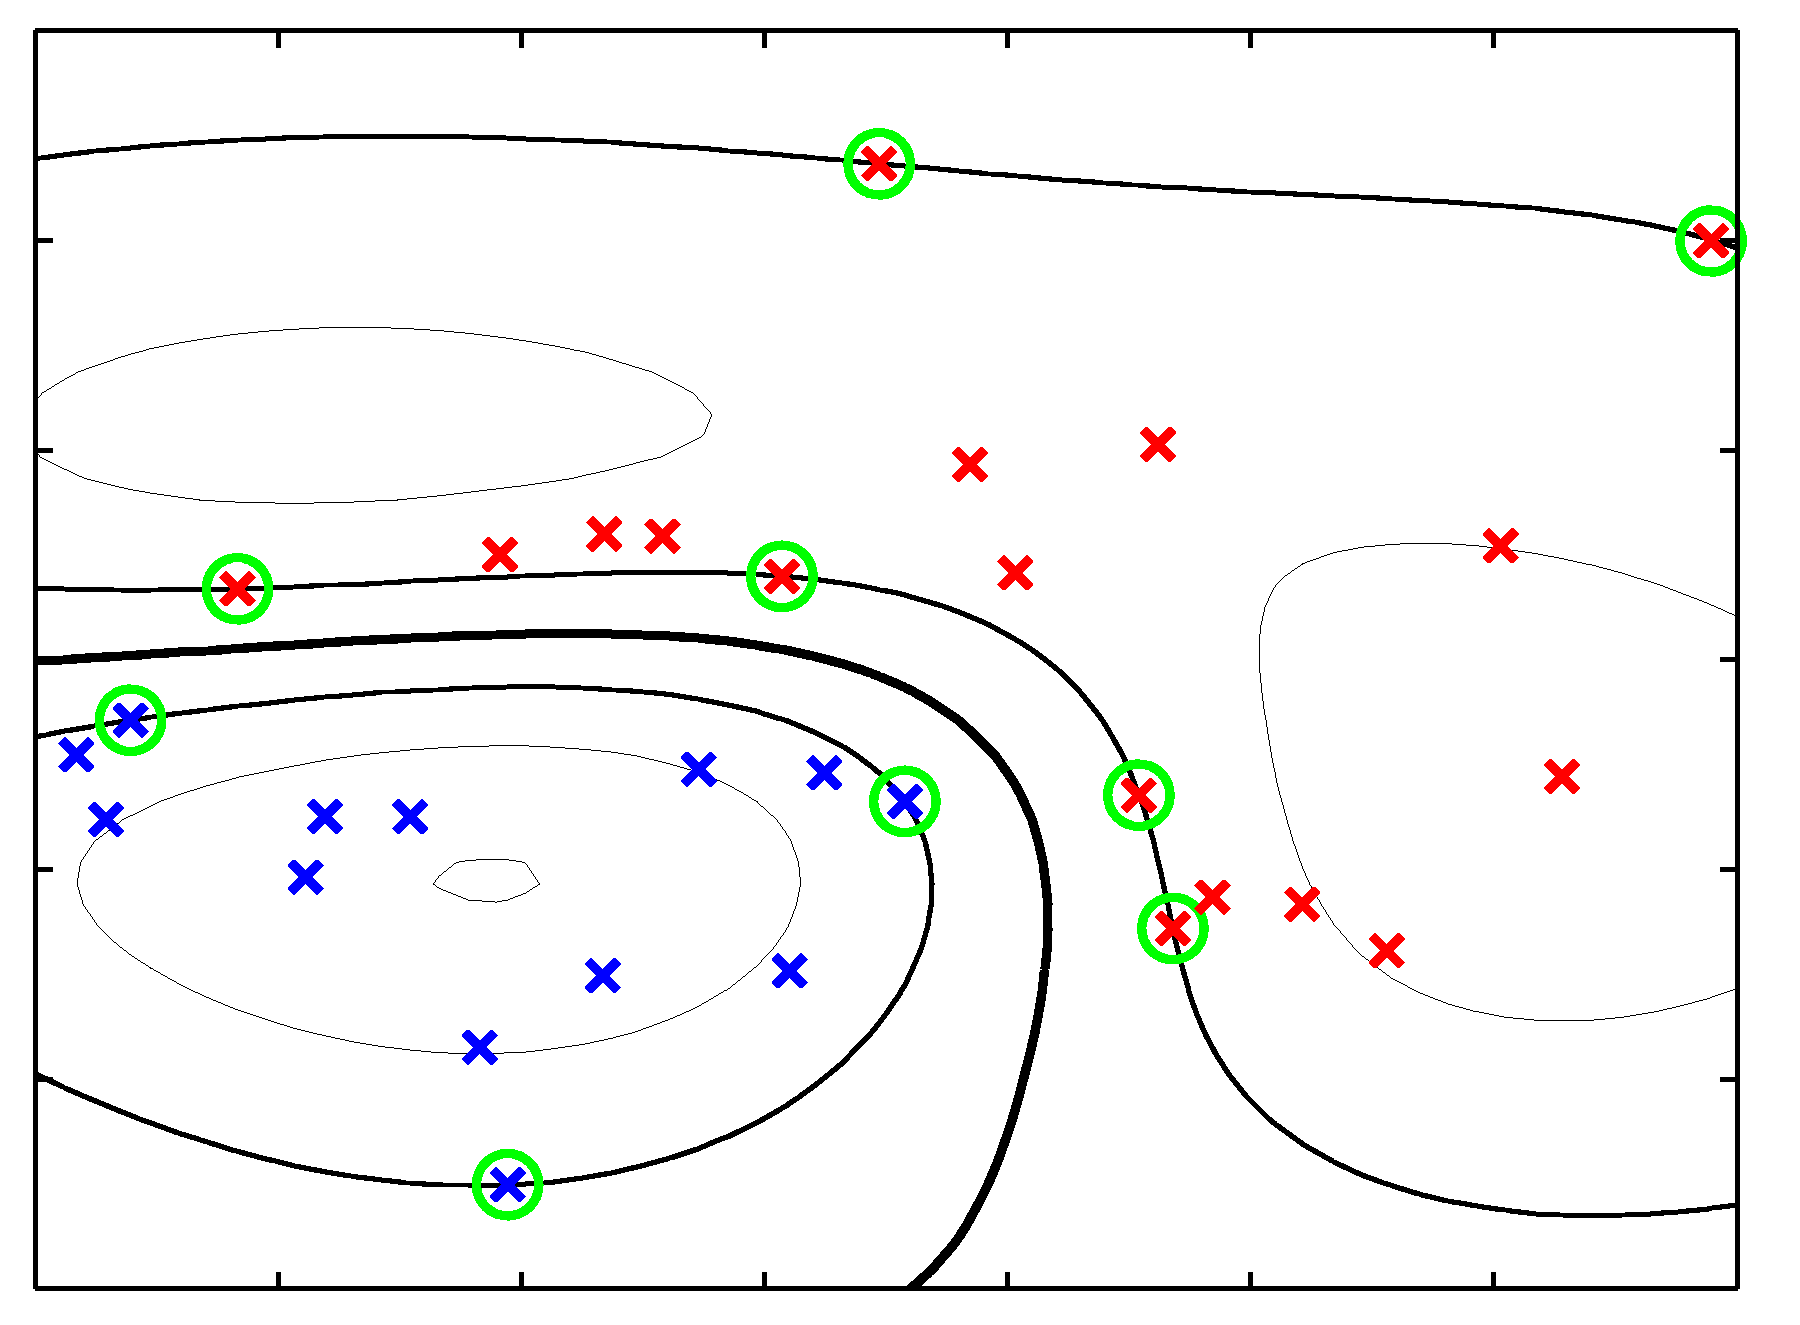

In [7]:
Image("figures/Figure7.2.png", width=400)

Figure on the left shows an example of the classification resulting from training a support
vector machine on a simple synthetic data set using a Gaussian kernel.

Although the data set is not linearly separable in the two-dimensional data space $x$, it is linearly separable in the nonlinear feature space defined implicitly by the nonlinear kernel function. Thus the training data points are perfectly separated
in the original data space.

This example also provides a geometrical insight into the origin of sparsity in the SVM. The maximum margin hyperplane is defined by the location of the support vectors. Other data points can be moved around freely (so long as they remain outside the margin region) without changing the decision boundary, and so the solution will be independent of such data points.

### Example

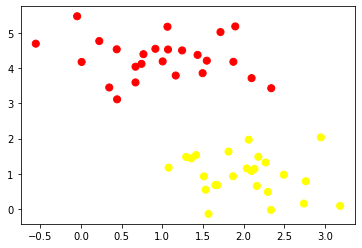

In [34]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

In [35]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear')
model.fit(X, y)

SVC(kernel='linear')

In [36]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, edgecolors='black',facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

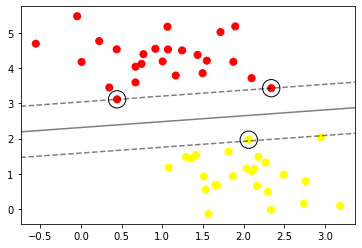

In [37]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

In [38]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

In [39]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 30, 60, 100, 200], ax=fixed(None));

interactive(children=(Dropdown(description='N', options=(10, 30, 60, 100, 200), value=10), Output()), _dom_cla…

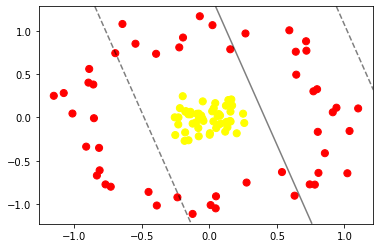

In [40]:
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [41]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

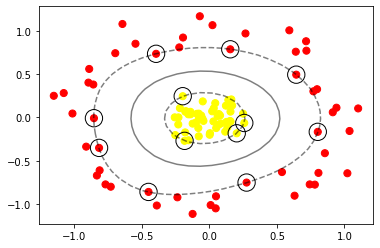

In [42]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

# Support Vector Machines: Overlapping Classes (Softening Margin)

To handle this case, the SVM implementation has a bit of a fudge-factor which "softens" the margin: that is, it allows some of the points to creep into the margin if that allows a better fit. The hardness of the margin is controlled by a tuning parameter, most often known as **slack varible** $\xi_n \geq 0$, $n=1,\dots, N$, with one slack variable for each training data point. For very large $\xi$, the margin is hard, and points cannot lie in it. For smaller $\xi$, the margin is softer, and can grow to encompass some points.

A **slack variable** is defined as $\xi_n = 0$ for data points that are on or inside the correct margin boundary and $\xi_n = |t_n - y(x_n)|$ for other points. Thus a data point that is on the decision boundary $y(x_n) = 0$ will have $\xi_n = 1$, and points with $\xi_n > 1$ will be misclassified. The exact classification constraints are then replaced with

$$t_n y(x_n) \geq 1 - \xi_n, n = 1, \dots, N$$

in which the slack variables are constrained to satisfy $\xi_n \geq 0$. 

* Data points for which $\xi_n = 0$ are correctly classified and are either on the margin or on the correct side of the margin. 
* Points for which $0 < \xi_n \leq 1$ lie inside the margin, but on the correct side of the decision boundary.
* And those data points for which $\xi_n > 1$ lie on the wrong side of the decision boundary and are misclassified.


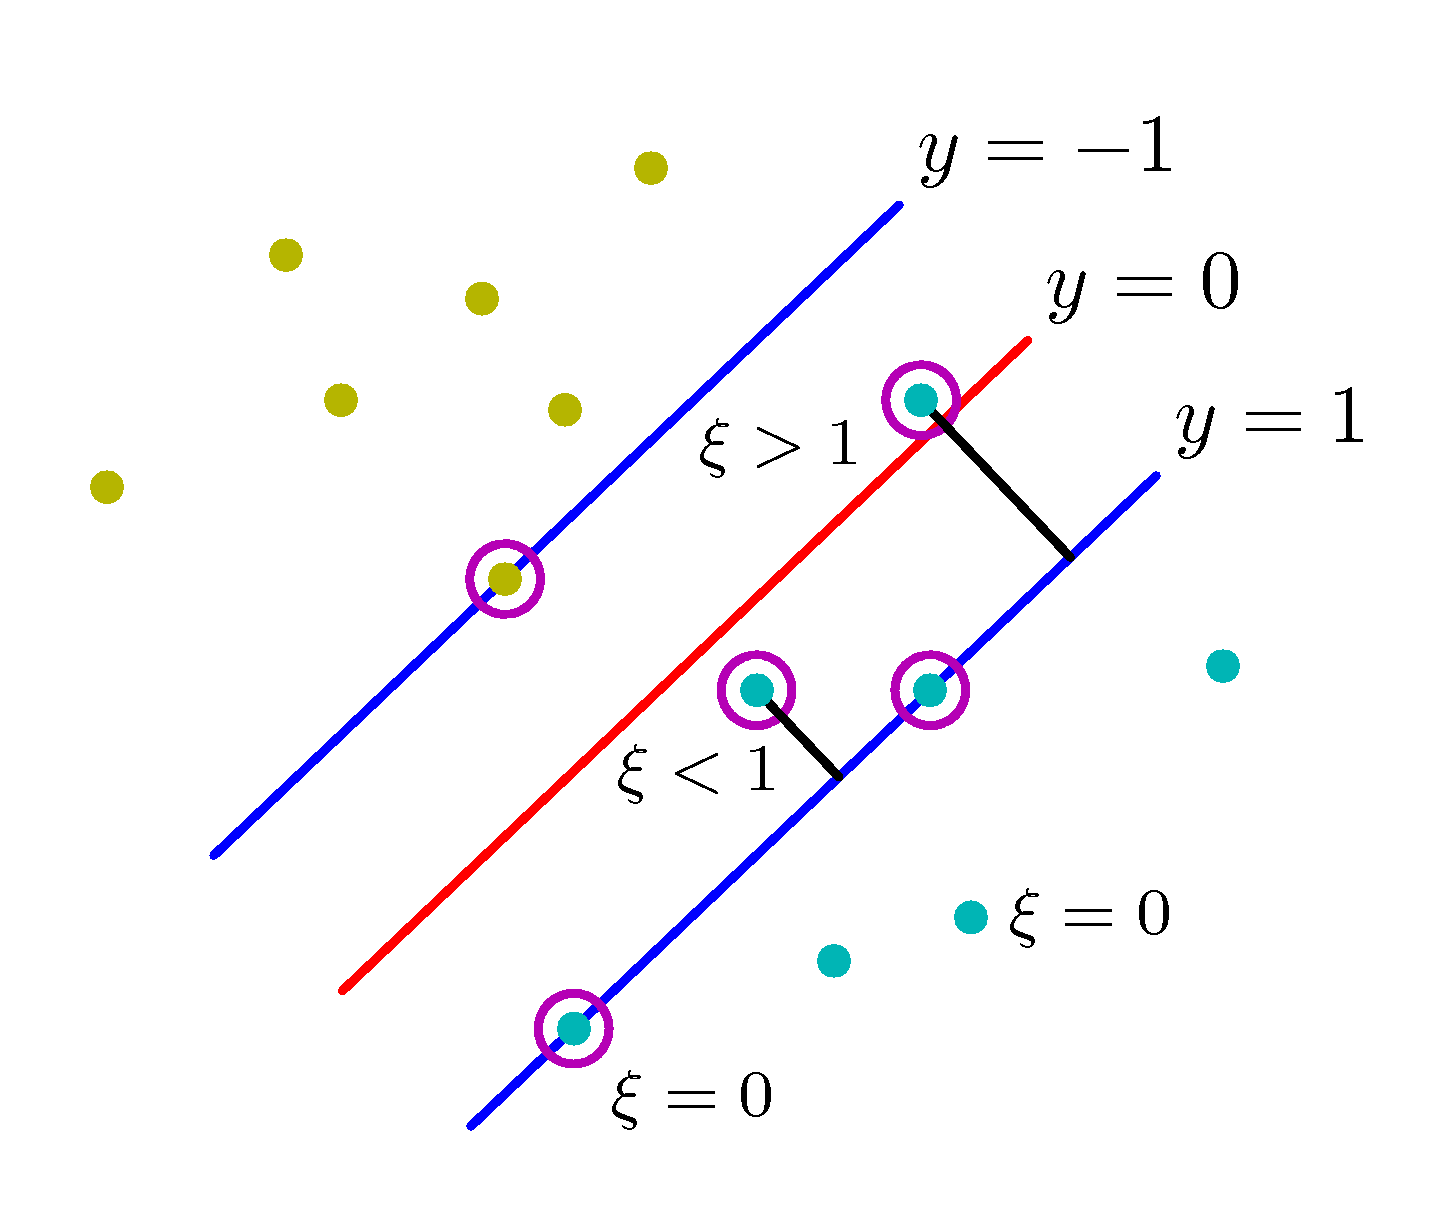

In [49]:
Image("figures/Figure7.3.png", width=400)

Our goal is now to maximize the margin while softly penalizing points that lie on the wrong side of the margin boundary. We therefore minimize:

\begin{align}
&\arg_{w,b} \min C\sum_{n=1}^N \xi_n + \frac{1}{2} \Vert w\Vert^2 \\
\text{subject to    } &t_n y(x_n) \geq 1 - \xi_n, n = 1, \dots, N\\
\text{and    } &\xi_n \geq 0, n = 1, \dots, N
\end{align}

where the parameter $C>0$ controls the trade-off between the slack variable penalty and the margin.

* Because any point that is misclassified has $\xi_n >1$, it follows that $\sum_n \xi_n$ is an upper bound on the number of misclassified points. 
* The parameter $C$ is therefore analogous to (the inverse of) a regularization coefficient because it controls the trade-off between minimizing training errors and controlling model complexity.
* In the limit $C \rightarrow \infty$, we will recover the earlier support vector machine for separable data.

The Lagrangian is given by:

$$L(w,b,a) = \frac{1}{2} \Vert w\Vert^2 + C\sum_{n=1}^N \xi_n - \sum_{n=1}^N a_n \left(t_n y(x_n) - 1 + \xi_n\right) - \sum_{n=1}^N \mu_n\xi_n$$

where $\{a_n \geq 0\}$ and $\{\mu_n \geq 0\}$ are Lagrange multipliers. The corresponding set of 
Karush–Kuhn–Tucker (KKT) conditions are given by

\begin{align}
a_n & \geq 0 \\
t_n y(x_n) - 1 + \xi_n & \geq 0 \\
a_n(t_n y(x_n) - 1 + \xi_n) & \geq 0 \\
\mu_n & \geq 0 \\
\xi_n & \geq 0\\
\mu_n \xi_n & = 0
\end{align}

where $n = 1, \dots, N$.

We now optimize for $w$, $b$ and $\{\xi_n\}$:

\begin{align}
\frac{\partial L}{\partial w} = 0 \Rightarrow & w = \sum_{n=1}^N a_n t_n \phi(x_n) \\
\frac{\partial L}{\partial b} = 0 \Rightarrow & \sum_{n=1}^N a_n t_n = 0 \\
\frac{\partial L}{\partial \xi_n} = 0 \Rightarrow & a_n = C - \mu_n \Rightarrow a_n \leq C
\end{align}

The dual Lagrangian is then given by:

$$\tilde{L}(a) = \sum_{n=1}^N a_n - \sum_{n=1}^N\sum_{m=1}^N a_n a_m t_n t_m k(x_n, x_m)$$

which is identical to the separable case, except that the constraints are somewhat different. We therefore have to minimize $\tilde{L}(a)$ with respect to the dual variables $\{a_n\}$ subject to

$$0 \leq a_n \leq C$$

$$\sum_{n=1}^N a_n t_n = 0$$

As before, a subset of the data points may have $a_n = 0$, in which case they do not contribute to the predictive model. The remaining data points constitute the support vectors. These have $a_n > 0$ and hence $t_n y(x_n) = 1 - \xi_n$.

* If $a_n < C$, then $\mu_n > 0$, which requires $\xi_n = 0$ and hence such points lie on the margin. 

* Points with $a_n = C$ can lie inside the margin and can either be correctly classified if $\xi_n \leq 1$ or misclassified if $\xi_n >1$.

To determine the parameter $b$, we note that those support vectors for which $0 < a_n < C$ have $\xi_n = 0$ so that $t_n y(x_n) = 1$ and hence will satisfy

$$t_n \left(\sum_{m\in S} a_m t_m k(x_n, x_m) + b\right) = 1$$

Again, a numerically stable solution is obtained by averaging to give

$$b = \frac{1}{N_M} \sum_{n\in M}\left(t_n - \sum_{m\in S} a_m t_m k(x_n, x_m)\right)$$

where $M$ denotes the set of indices of data points having $0 < a_n < C$.


Although predictions for new inputs are made using only the support vectors, the training phase (i.e., the determination of the parameters $a$ and $b$) makes use of the whole data set, and so it is important to have **efficient algorithms for solving the quadratic programming problem**.

We first note that the objective function $\tilde{L}(a)$ is quadratic and so any local optimum will also be a **global
optimum** provided the constraints define a convex region (which they do as a consequence of being linear).

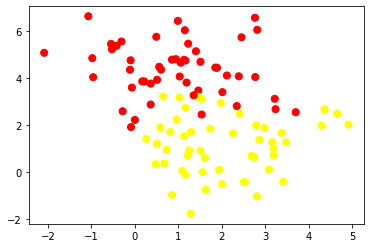

In [43]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

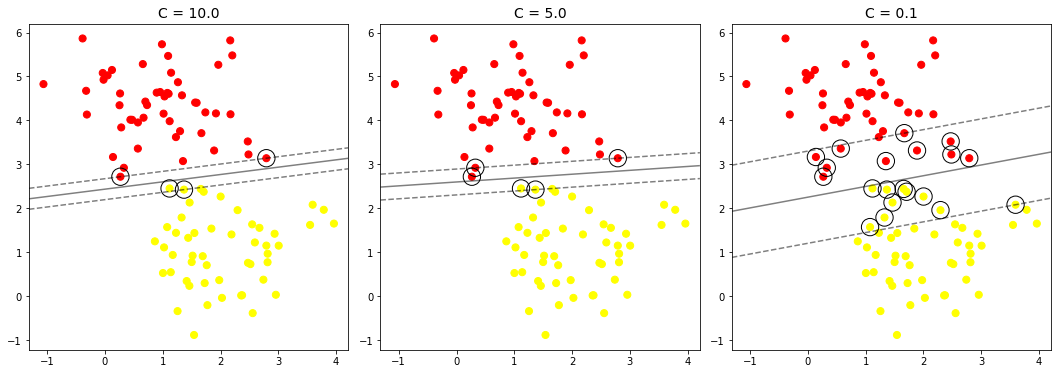

In [50]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 3, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10, 5, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

The optimal value for the $C$ parameter will depend on your dataset, and should be tuned using cross-validation or a similar procedure.